In [15]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# basic preparation
algos = ["SVM", "KNN", "Logistic Regression", "Random Forest Classifier", "Naive Bayes Classifier", "Decision Tree Classifier"]
accuracy = {}
predicts = []
x=df.iloc[:,1:3001]
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [7]:
# helper function

def Result(model_type, y_pred):
    accuracy[model_type] = accuracy_score(y_test, y_pred)
    predicts.append(y_pred)
    print(accuracy[model_type])

In [8]:
# SVM

svm=SVC(C=1.0,kernel="rbf",gamma="auto")
svm.fit(x_train,y_train)
predict=svm.predict(x_test)
Result("SVM", predict)

0.9002320185614849


In [9]:
# KNN

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
Result("KNN", predict)

0.8453209590100541


In [10]:
# Logistic Regression

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
predict = lr.predict(x_test)
Result("Logistic Regression", predict)

0.9675174013921114


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
Result("Random Forest Classifier", predict)

0.9690641918020109


In [12]:
# Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predict = gnb.predict(x_test)
Result("Naive Bayes Classifier", predict)

0.9450889404485692


In [13]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predict = dtc.predict(x_test)
Result("Decision Tree Classifier", predict)

0.9435421500386698


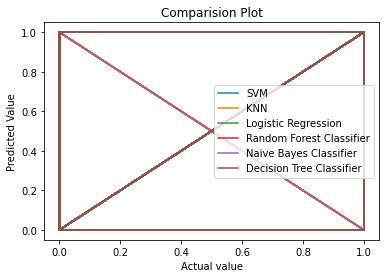

In [16]:
for i in range(len(algos)):
    plt.plot(y_test, predicts[i], linestyle='-', label=algos[i])

plt.title('Comparision Plot')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()